In [21]:
import numpy as np
import pandas as pd
from collections import OrderedDict
import ROOT
from ROOT import gROOT
import math

In [22]:
from PasOrPaper import doPAS
print(doPAS)

False


In [23]:
import CMS_lumi, tdrstyle
from array import array

#set the tdr style
tdrstyle.setTDRStyle()

In [24]:
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
if doPAS:
    CMS_lumi.extraText = "Simulation Preliminary"
else:
    CMS_lumi.extraText = "Simulation"
CMS_lumi.lumi_sqrtS = "(13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
#CMS_lumi.lumi_sqrtS = ""

iPos = 11
iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.12

In [25]:
H_ref = 800; 
W_ref = 800; 
W = W_ref
H  = H_ref

# 
# Simple example of macro: plot with CMS name and lumi text
#  (this script does not pretend to work in all configurations)
# iPeriod = 1*(0/1 7 TeV) + 2*(0/1 8 TeV)  + 4*(0/1 13 TeV) 
# For instance: 
#               iPeriod = 3 means: 7 TeV + 8 TeV
#               iPeriod = 7 means: 7 TeV + 8 TeV + 13 TeV 
#               iPeriod = 0 means: free form (uses lumi_sqrtS)
# Initiated by: Gautier Hamel de Monchenault (Saclay)
# Translated in Python by: Joshua Hardenbrook (Princeton)
# Updated by:   Dinko Ferencek (Rutgers)
#

iPeriod = 3

# references for T, B, L, R
T = 0.08*H_ref
B = 0.15*H_ref 
L = 0.16*W_ref
R = 0.04*W_ref

canvas = ROOT.TCanvas("c2","c2",50,50,W,H)
canvas.SetFillColor(0)
canvas.SetBorderMode(0)
canvas.SetFrameFillStyle(0)
canvas.SetFrameBorderMode(0)
canvas.SetLeftMargin( L/W )
canvas.SetRightMargin( R/W )
canvas.SetTopMargin( T/H )
canvas.SetBottomMargin( B/H )
canvas.SetTickx(1)
canvas.SetTicky(1)

padsize2 = 0.332
padsize1 = 0.667
padsize3 = 0
pad1 = ROOT.TPad("pad1", "pad1", 0, padsize2, 1, 1)
pad2 = ROOT.TPad("pad2", "pad1", 0, 0, 1, padsize2)
pad1.SetTopMargin(0.06/padsize1)
pad1.SetBottomMargin(0.012/padsize1)
pad1.SetLeftMargin(0.19 * (600.0)/W)
pad2.SetTopMargin(0.010/padsize2)
pad2.SetBottomMargin(0.13/padsize2)
pad2.SetLeftMargin(0.19 * (600.0)/W)
pad2.SetGridy(1)
pad2.SetTicks(1,1)
pad1.Draw()
pad2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


In [26]:
xmin = 0.5
xmax = 22.0
ymin = 0.5
ymax = 25.0
yrmin = 0.89
yrmax = 1.11
ytitle = "Throughput [evt/s]"
yrtitle = "Ratio"
xtitle = "Number of threads per job"

In [27]:
df = pd.read_csv('cputest/latency_plot_miniaod.log', header=None, delimiter=r"\s+")

In [28]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,Direct,2,2.05915,2.04879,2.07024,2.04044,2.09121,2.15651,2.08863,2.06970,2.16520,2.08431
1,Direct,4,4.39289,4.19899,4.28391,4.36265,4.35772,NaN,NaN,NaN,NaN,NaN
2,Direct,5,5.14133,5.10672,5.16654,5.11565,NaN,NaN,NaN,NaN,NaN,NaN
3,Direct,10,10.16460,10.07830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Direct,20,17.42180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SONIC,2,2.19462,2.16433,2.09935,2.06214,2.15827,2.08135,2.07239,2.04091,2.08112,2.08234
6,SONIC,4,4.22837,4.28420,4.24052,4.11495,4.37010,NaN,NaN,NaN,NaN,NaN
7,SONIC,5,5.30448,5.24871,5.19070,5.18922,NaN,NaN,NaN,NaN,NaN,NaN
8,SONIC,10,10.15340,9.82128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,SONIC,20,17.30980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.iloc[:, 2:].std(axis=1)

0    0.042106
1    0.078259
2    0.026989
3    0.061023
4         NaN
5    0.050613
6    0.092685
7    0.054960
8    0.234844
9         NaN
dtype: float64

In [30]:
results = OrderedDict()
for index, row in df.iterrows():
    if row[0] not in results:
        results[row[0]] = []
    results[row[0]].append([row[1], row[2:].mean(), 0., row[2:].std()])
                            
for key, val in results.items():
    val = np.array(val, dtype=np.float32)
    val = np.nan_to_num(val)
    results[key] = val
print(results)

OrderedDict([('Direct', array([[ 2.        ,  2.087418  ,  0.        ,  0.04210621],
       [ 4.        ,  4.319232  ,  0.        ,  0.07825876],
       [ 5.        ,  5.13256   ,  0.        ,  0.02698893],
       [10.        , 10.12145   ,  0.        ,  0.06102331],
       [20.        , 17.4218    ,  0.        ,  0.        ]],
      dtype=float32)), ('SONIC', array([[ 2.        ,  2.103682  ,  0.        ,  0.05061292],
       [ 4.        ,  4.247628  ,  0.        ,  0.09268461],
       [ 5.        ,  5.2332773 ,  0.        ,  0.05496018],
       [10.        ,  9.98734   ,  0.        ,  0.2348443 ],
       [20.        , 17.3098    ,  0.        ,  0.        ]],
      dtype=float32))])


In [31]:
array('f', results['Direct'][:,0])

array('f', [2.0, 4.0, 5.0, 10.0, 20.0])

In [32]:
pad1.cd()
pad1.SetGrid(0, 0)
pad1.SetTicks(1,1)
h1 = ROOT.TH1F("h1", "h1", 80, xmin, xmax)
h1.SetMinimum(ymin)
h1.SetMaximum(ymax)
#print "xmin : %f xmax : %f"%(xmin, xmax)
h1.GetXaxis().SetNdivisions(6, 5, 0)
h1.GetYaxis().SetNdivisions(6, 5, 0)
h1.GetYaxis().SetTitle(ytitle)
h1.GetYaxis().SetTitleSize(0.050/(padsize1+padsize3))
h1.GetYaxis().SetLabelSize(0.045/(padsize1+padsize3))
h1.GetXaxis().SetTitleSize(0.050/(padsize1+padsize3))
h1.GetXaxis().SetLabelSize(0.045/(padsize1+padsize3))
h1.GetYaxis().SetTitleOffset(1.75*(padsize1+padsize3)*(600.0/W))
h1.GetXaxis().SetTitleOffset(1.1*(padsize1+padsize3))
h1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


In [33]:
pad1.cd()
graphs = []
colors = [1,2,4,3]
styles = [20, 21, 22, 23]

for key, val in results.items():
    # TGraphErrors only support array.array, not numpy arrays..???
    xvals = array('d', val[:,0])
    yvals = array('d', val[:,1])
    xerrs = array('d', val[:,2])
    yerrs = array('d', val[:,3])
    gr = ROOT.TGraphErrors(5, xvals, yvals, xerrs, yerrs)
    print(xvals)
    print(yvals)
    graphs.append(gr)

for m in range(len(graphs)):
    graphs[m].SetLineColor( colors[m] )
    graphs[m].SetLineWidth( 2 )
    graphs[m].SetMarkerColor( colors[m] )
    graphs[m].SetMarkerStyle( styles[m] )
    print("drawing")
    graphs[m].Draw('LEPsame')

array('d', [2.0, 4.0, 5.0, 10.0, 20.0])
array('d', [2.0874180793762207, 4.319231986999512, 5.132559776306152, 10.121450424194336, 17.42180061340332])
array('d', [2.0, 4.0, 5.0, 10.0, 20.0])
array('d', [2.103682041168213, 4.247628211975098, 5.233277320861816, 9.987339973449707, 17.309799194335938])
drawing
drawing


In [34]:
CMS_lumi.CMS_lumi( pad1, 0, iPos )
legend = ROOT.TLegend(0.20,0.65,0.55,0.85);
#legend.SetHeader("The Legend Title","C"); // option "C" allows to center the header
legend.AddEntry(graphs[0],'"CPU Direct-inference" Jobs',"pl");
legend.AddEntry(graphs[1],'SONIC Jobs on Local CPUs',"pl");
#gStyle.SetLegendBorderSize(1);
#gStyle.SetLegendFillColor(0);
legend.SetTextFont(42);
legend.SetTextSize(0.045);
legend.Draw('same');

(13 TeV)


In [35]:
#pad1.Update()
#pad1.RedrawAxis()
pad1.RedrawAxis("G")
pad1.Update()

In [36]:
pad2.cd()

In [37]:
h2 = ROOT.TH1F("h2", "h2", 80, xmin, xmax)
padsize3 = 0
h2.GetXaxis().SetTitleSize(0.050/(padsize2+0.3*padsize3))
h2.GetXaxis().SetLabelSize(0.045/(padsize2+0.3*padsize3))
h2.GetYaxis().SetTitleSize(0.050/(padsize2+0.3*padsize3))
h2.GetYaxis().SetLabelSize(0.045/(padsize2+0.3*padsize3))
h2.GetYaxis().SetTitleOffset(1.80*(padsize2+0.35*padsize3)*(600.0/W))
h2.GetYaxis().SetNdivisions(8)
h2.GetYaxis().CenterTitle()
h2.GetYaxis().SetTitle(yrtitle)
h2.GetXaxis().SetTitle(xtitle)
h2.SetMinimum(yrmin)
h2.SetMaximum(yrmax)
h2.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [38]:
pad2.cd()
base = 'Direct'
val_base = results[base]
rgraphs = []
for key, val in results.items():
    if key == 'Direct':
        continue
    # TGraphErrors only support array.array, not numpy arrays..???
    xvals = array('d', val[:,0])
    yvals = array('d', val[:,1] / val_base[:,1])
    xerrs = array('d', val[:,2])
    yerrs = array('d', np.sqrt(np.power(val[:,3]/val[:,1], 2.0) + np.power(val_base[:,3]/val_base[:,1],2.0)))
    gr = ROOT.TGraphErrors(5, xvals, yvals, xerrs, yerrs)
    print(yvals)
    rgraphs.append(gr)

for m in range(len(rgraphs)):
    rgraphs[m].SetLineColor( colors[m+1] )
    rgraphs[m].SetLineWidth( 2 )
    rgraphs[m].SetMarkerColor( colors[m+1] )
    rgraphs[m].SetMarkerStyle( styles[m+1] )
    rgraphs[m].Draw('LEP,same')

array('d', [1.0077913999557495, 0.9834221005439758, 1.0196232795715332, 0.9867498874664307, 0.9935711622238159])


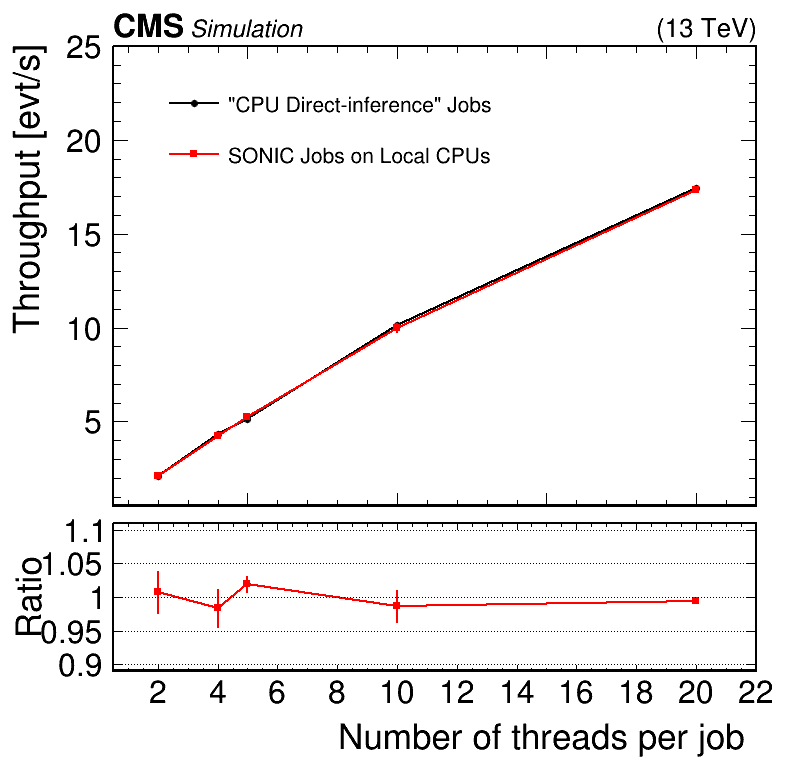

In [39]:
pad2.RedrawAxis("G")
pad2.Update()
canvas.Draw()

In [41]:
#canvas.SaveAs('plots_for_DPS/'+"CPUTest_throughput.pdf")
canvas.SaveAs("plots/CPUTest_throughput.pdf")

Info in <TCanvas::Print>: pdf file plots/CPUTest_throughput.pdf has been created
